In [53]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
import networkx as nx
%matplotlib inline

In [5]:
def visualize_graph(G, pos=None, return_internals=False):
    # ignore it, we'll come back later
    if pos is None:
        pos = pos=nx.spring_layout(G)
    nx.draw(G, pos)
    _mute = nx.draw_networkx_nodes(G, pos, node_color='#ccccff')
    _mute = nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    _mute = nx.draw_networkx_labels(G, pos)
    edge_labels = {}
    for e in G.edges():
        edge_labels[e] = ','.join(['%s=%s' % (k,v) for (k, v) in G[e[0]][e[1]].items()])
    _mute = nx.draw_networkx_edge_labels(G, pos)
    if return_internals:
        return pos, labels, edge_labels

# Node notes

In [46]:
# node_3 = ("asdsdasd",'0B1qO9IFWVA4Rms',{'pid' : "", 'title':"blah"})
# node_2 = ("1c0RWzfRDasdasd333asdasasdasd2eg",'0B1qO9IFWVA4Rms',{ 'pid':"0B1qO9IFWVA4Rms", 'title':"blah", "color": "g" ,'node_color':'b'})
# G.add_edges_from([node_2, node_3])

In [52]:
# load data
df = pd.read_csv('kw_drive.csv')

In [11]:
# build pair graph
G = nx.Graph()
prev = (0,0,{})
for index,row in df.iterrows():
    if row['type'] == 'folder':
        new_node = (row['id'],row['parentid'])
        G.add_edges_from([new_node, prev])
        prev = new_node

In [65]:
Gf = nx.Graph()
prev = (0,0,{})
for index,row in df.iterrows():
    if row['type'] == 'file':
        new_node = (row['id'],row['parentid'])
        Gf.add_edges_from([new_node, prev])
        prev = new_node

In [ ]:
# .graphml? maybe one day
# nx.write_graphml(G,'so.graphml')

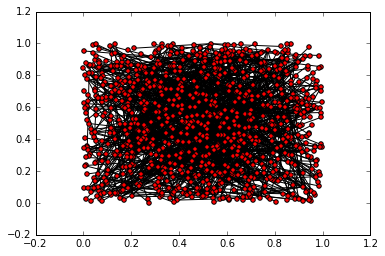

In [54]:
nx.draw_networkx(G,with_labels=False,node_size=20, pos=nx.random_layout(G))

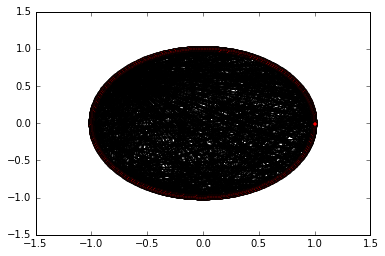

In [55]:
nx.draw_networkx(G,with_labels=False,node_size=20, pos=nx.shell_layout(G))

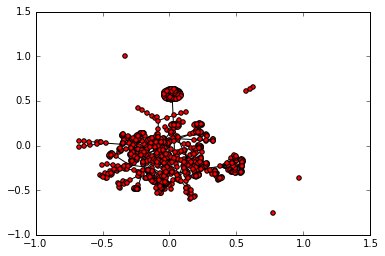

In [57]:
nx.draw_networkx(G,with_labels=False,node_size=20)

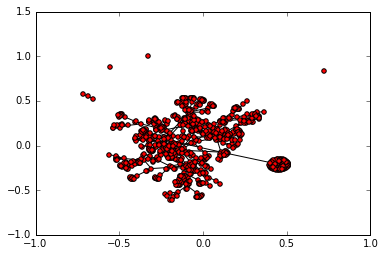

In [61]:
# folders only
nx.draw_networkx(G,with_labels=False,node_size=20, pos=nx.spring_layout(G))

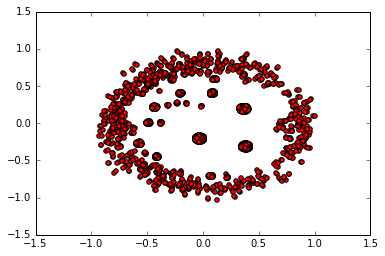

In [66]:
# files only
nx.draw_networkx(Gf,with_labels=False,node_size=20, pos=nx.spring_layout(Gf))

In [44]:
import heapq
centrality = nx.degree_centrality(G)
nodes = heapq.nlargest(10, centrality, key=lambda n: centrality[n])
print nodes

['0B1qO9IFXquq6dUl0UE1VMzdkRTg', '0B1qO9IFXquq6T3hOWEJDX3AtOFE', '0AFqO9IFXquq6Uk9PVA', '0BwdT3AU3CbQCOU1hTzBveTNHRkU', '0B1qO9IFXquq6a0Y3OWxEZGttYWM', '0B1qO9IFXquq6OGwwT3VZSzZia1E', '0B1qO9IFXquq6UnFxV2tONGpFUmc', '0B1qO9IFXquq6eWQ5R21TM3BrYmc', '0B1qO9IFXquq6Zmp6WUdXNzZIeXM', '0B1qO9IFXquq6SUVaendONFNHWFk']


In [45]:
dataz = []
for node in nodes:
    dataz.append(df[df['id'] == node])
dataz


[                                id    type                           title  \
 3654  0B1qO9IFXquq6dUl0UE1VMzdkRTg  folder  (Backupify Restore 2014/11/18)   
 
                  parentid  
 3654  0AFqO9IFXquq6Uk9PVA  ,
                                 id    type                           title  \
 3472  0B1qO9IFXquq6T3hOWEJDX3AtOFE  folder  (Backupify Restore 2014/11/17)   
 
                  parentid  
 3472  0AFqO9IFXquq6Uk9PVA  ,
                        id    type     title parentid
 3668  0AFqO9IFXquq6Uk9PVA  folder  My Drive      NaN,
                                 id    type              title parentid
 3676  0BwdT3AU3CbQCOU1hTzBveTNHRkU  folder  Forced Fun Photos      NaN,
                                 id    type                             title  \
 3359  0B1qO9IFXquq6a0Y3OWxEZGttYWM  folder  1. ACTIVE PRODUCT OPS CANDIDATES   
 
                           parentid  
 3359  0B1qO9IFXquq6T3hOWEJDX3AtOFE  ,
                                 id    type                        